In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [3]:
df = pd.read_csv('../datasets/dogs.csv')

In [4]:
df

,breed,height,weight
0,Border Collie,20,45
1,Boston Terrier,16,20
2,Brittany Spaniel,18,35
3,Bullmastiff,27,120
4,Chihuahua,8,8
5,German Shepherd,25,78
6,Golden Retriever,23,70
7,Great Dane,32,160
8,Portuguese Water Dog,21,50
9,Standard Poodle,19,65


In [5]:
fearure_names = df.columns[1:]

In [6]:
X = df[fearure_names]

In [7]:
X

,height,weight
0,20,45
1,16,20
2,18,35
3,27,120
4,8,8
5,25,78
6,23,70
7,32,160
8,21,50
9,19,65


In [8]:
type(X)

pandas.core.frame.DataFrame

In [10]:
scaler = MinMaxScaler()

In [11]:
scaler.fit(X)

MinMaxScaler()

In [12]:
X = pd.DataFrame(scaler.transform(X), columns=fearure_names)

In [13]:
X

,height,weight
0,0.538462,0.248366
1,0.384615,0.084967
2,0.461538,0.183007
3,0.807692,0.738562
4,0.076923,0.006536
5,0.730769,0.464052
6,0.653846,0.411765
7,1.000000,1.000000
8,0.576923,0.281046
9,0.500000,0.379085


In [9]:
from sklearn.cluster import AgglomerativeClustering

In [14]:
model = AgglomerativeClustering(n_clusters=2, linkage='single',compute_distances=True)

In [15]:
model.fit(X)

AgglomerativeClustering(compute_distances=True, linkage='single')

In [16]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [17]:
df[model.labels_ == 1]

,breed,height,weight
7,Great Dane,32,160


In [18]:
df[model.labels_ == 0]

,breed,height,weight
0,Border Collie,20,45
1,Boston Terrier,16,20
2,Brittany Spaniel,18,35
3,Bullmastiff,27,120
4,Chihuahua,8,8
5,German Shepherd,25,78
6,Golden Retriever,23,70
8,Portuguese Water Dog,21,50
9,Standard Poodle,19,65
10,Yorkshire Terrier,6,7


In [19]:
model.children_

array([[ 0,  8],
       [ 4, 10],
       [ 6,  5],
       [11,  2],
       [14,  9],
       [15,  1],
       [16, 13],
       [17,  3],
       [18, 12],
       [19,  7]])

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [21]:
Z = linkage(X, method='single')

In [22]:
Z

array([[ 0.        ,  8.        ,  0.05047034,  2.        ],
       [ 4.        , 10.        ,  0.07720025,  2.        ],
       [ 5.        ,  6.        ,  0.09301156,  2.        ],
       [ 2.        , 11.        ,  0.10094068,  3.        ],
       [ 9.        , 14.        ,  0.1246148 ,  4.        ],
       [ 1.        , 15.        ,  0.1246148 ,  5.        ],
       [13.        , 16.        ,  0.15167269,  7.        ],
       [ 3.        , 17.        ,  0.28508383,  8.        ],
       [12.        , 18.        ,  0.31753116, 10.        ],
       [ 7.        , 19.        ,  0.32454896, 11.        ]])

In [23]:
from sklearn.metrics import silhouette_score

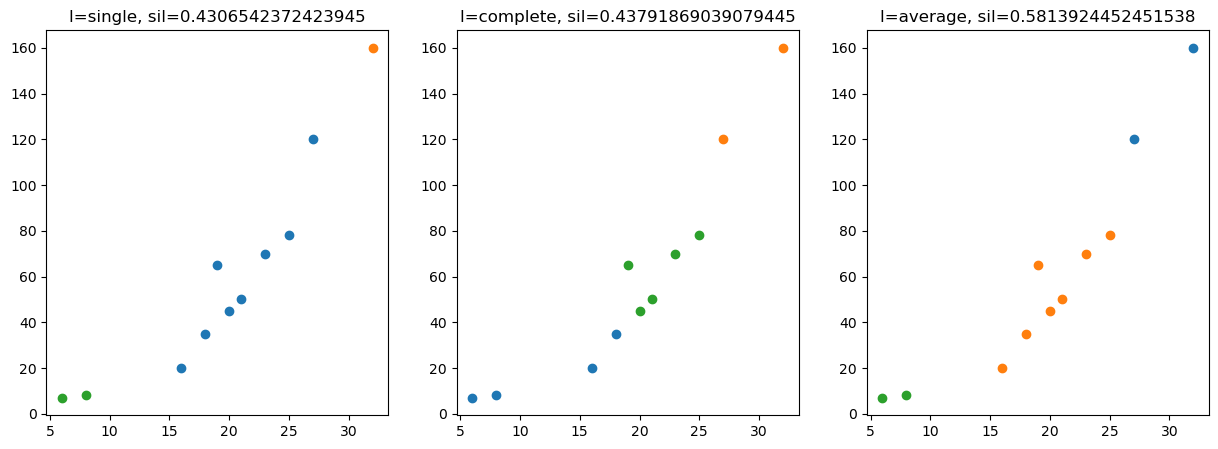

In [28]:
k = 3
linkages = ['single', 'complete', 'average']
fig = plt.figure(figsize=(15,5))

for idx, linkage in enumerate(linkages):
    model = AgglomerativeClustering(n_clusters=k, linkage=linkage)
    model.fit(X)
    
    fig.add_subplot(1, len(linkages), idx+1)
    idx += 1
    
    for label in range(k):
        elems = df[model.labels_ == label]
        plt.scatter(elems['height'], elems['weight'])
    
    plt.title(f'l={linkage}, sil={silhouette_score(X, model.labels_)}')

In [30]:
X.set_index(df['breed'], inplace=True)

In [31]:
X

,height,weight
breed,,
Border Collie,0.538462,0.248366
Boston Terrier,0.384615,0.084967
Brittany Spaniel,0.461538,0.183007
Bullmastiff,0.807692,0.738562
Chihuahua,0.076923,0.006536
German Shepherd,0.730769,0.464052
Golden Retriever,0.653846,0.411765
Great Dane,1.000000,1.000000
Portuguese Water Dog,0.576923,0.281046


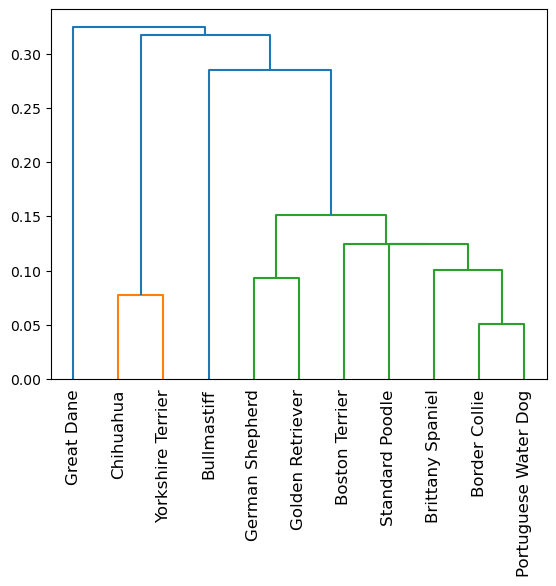

In [32]:
_ = dendrogram(Z, labels=X.index, leaf_rotation='90')

In [33]:
from sklearn.cluster import DBSCAN

In [35]:
model = DBSCAN(eps=0.1, min_samples=2)

In [36]:
model.fit(X)

DBSCAN(eps=0.1, min_samples=2)

In [37]:
model.labels_

array([ 0, -1, -1, -1,  1,  2,  2, -1,  0, -1,  1])

In [38]:
np.unique(model.labels_)

array([-1,  0,  1,  2])

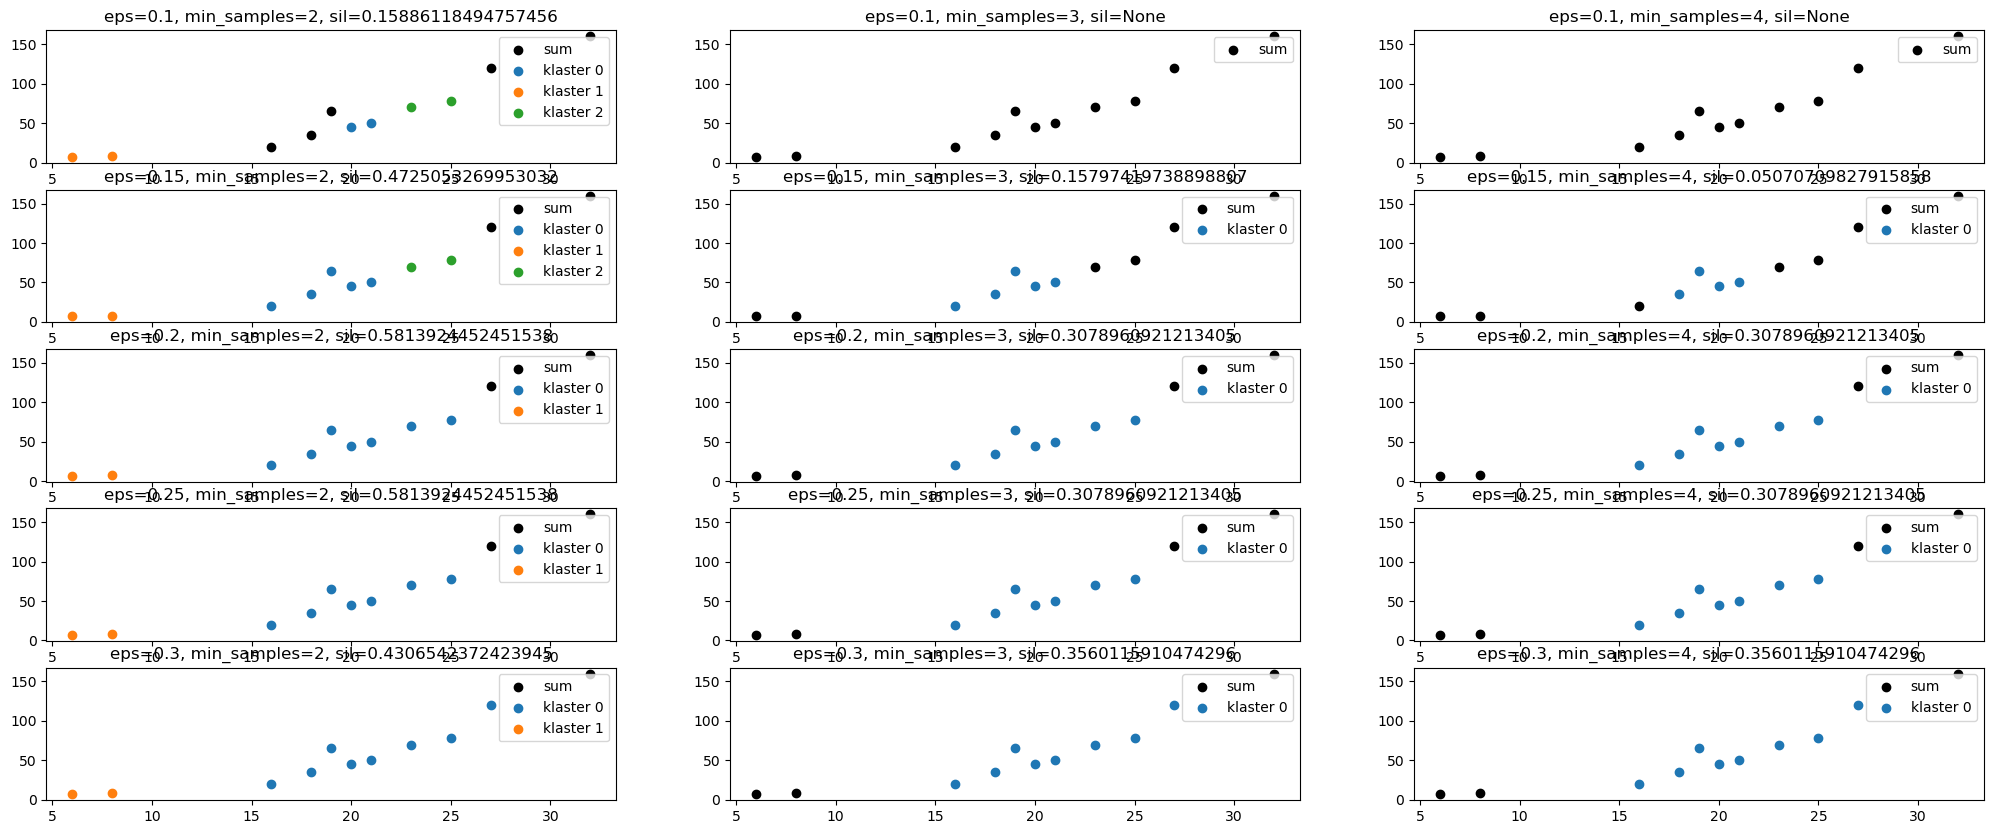

<Figure size 640x480 with 0 Axes>

In [41]:
min_samples = 2
eps_values = [0.1, 0.15, 0.2, 0.25, 0.3]
min_samples_values = range(2,5)
fig = plt.figure(figsize=(25,10))
idx = 1

for eps in eps_values:
    for min_samples in min_samples_values:
        model = DBSCAN(eps=eps, min_samples=min_samples)
        model.fit(X)
        
        fig.add_subplot(len(eps_values), len(min_samples_values), idx)
        idx += 1
        
        for label in np.unique(model.labels_):
            elems = df[model.labels_ == label]
            
            if label == -1:
                plt.scatter(elems['height'], elems['weight'], color='black', label='sum')
            else:
                plt.scatter(elems['height'], elems['weight'], label=f'klaster {label}')
                
        plt.legend()
        
        if len(np.unique(model.labels_)) == 1:
            s = None
        else:
            s = silhouette_score(X, model.labels_)
            
        plt.title(f'eps={eps}, min_samples={min_samples}, sil={s}')
        
plt.show()
plt.tight_layout()